## Load the Data and Set the Path

In [1]:
setwd("~/Desktop/Projects/Global-Preferences-Survey/")
source("ReproductionAnalysis/functions/helper_functions/SourceFunctions.r")
SourceFunctions(path = "ReproductionAnalysis/functions/")
SourceFunctions(path = "ReproductionAnalysis/functions/helper_functions/")
SourceFunctions(path = "New_Analysis/functions/")

In [2]:
# Load libraries
LoadRequiredLibraries()
LoadLibrariesNewModels()
select <- dplyr::select
melt <- reshape2::melt


Attaching package: ‘data.table’


The following object is masked from ‘package:rlang’:

    :=


Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:data.table’:

    setattr


The following object is masked from ‘package:base’:

    xor


Attaching package bit64

package:bit64 (c) 2011-2017 Jens Oehlschlaegel

creators: integer64 runif64 seq :

coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bitstring

logical operator: ! & | xor != == < <= >= >

arithmetic operator: + - * / %/% %% ^

math: sign abs sqrt log log2 log10

math: floor ceiling trunc round

querying: is.integer64 is.vector [is.atomic} [length] format print str

values: is.na is.nan is.finite is.infinite

aggregation: any all min max range sum prod

cumulation: diff cummin cummax cumsum cumprod

access: length<- [ [<- [[ [[<-

combine: c rep cbind rbind as.data.frame

WARNING don't use as subscripts

WARNING semantics differ from integer



The following object is masked from ‘package:dplyr’:

    slice




In [3]:
# Load the data
data_all <- LoadData()

## Data Preparation

In [4]:
data_all <- PrepareData(data_all)

# Use only the complete dataset
dataComplete <- data_all$data[complete.cases(data_all$data)]

# Add important column
dataComplete[, logAvgGDPpc := log(avgGDPpc), by = "country"]
dataComplete[, avgGDPpc := NULL]

# Adjust some of the columns and add new ones
dataComplete <- AdjustColumns(dataComplete)

In [5]:
dataComplete[, trustRaw := as.factor(trust)]

## Model analysis

What does influences the most the results?

In [6]:
# Intercept only
model_trust <- dlply(dataComplete, "country", function(dt)
  lm(trust ~ 1, data = dt))
model_risktaking <- dlply(dataComplete, "country", function(dt)
  lm(risktaking ~ 1, data = dt))
model_altruism <- dlply(dataComplete, "country", function(dt)
  lm(altruism ~ 1, data = dt))
model_posrecip <- dlply(dataComplete, "country", function(dt)
  lm(posrecip ~ 1, data = dt))
model_negrecip <- dlply(dataComplete, "country", function(dt)
  lm(negrecip ~ 1, data = dt))
model_patience <- dlply(dataComplete, "country", function(dt)
  lm(patience ~ 1, data = dt))

In [7]:
# Intercept + gender
modelG_trust <- dlply(dataComplete, "country", function(dt)
  lm(trust ~ gender, data = dt))
modelG_risktaking <- dlply(dataComplete, "country", function(dt)
  lm(risktaking ~ gender, data = dt))
modelG_altruism <- dlply(dataComplete, "country", function(dt)
  lm(altruism ~ gender, data = dt))
modelG_posrecip <- dlply(dataComplete, "country", function(dt)
  lm(posrecip ~ gender, data = dt))
modelG_negrecip <- dlply(dataComplete, "country", function(dt)
  lm(negrecip ~ gender, data = dt))
modelG_patience <- dlply(dataComplete, "country", function(dt)
  lm(patience ~ gender, data = dt))

In [8]:
AIC_altruism <- Map(function(model_altruism, modelG_altruism) 
    anova(model_altruism, modelG_altruism), 
    model_altruism, modelG_altruism)

In [9]:
print(AIC_altruism)

$Afghanistan
Analysis of Variance Table

Model 1: altruism ~ 1
Model 2: altruism ~ gender
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    954 994.87                           
2    953 993.41  1    1.4588 1.3995 0.2371

$Algeria
Analysis of Variance Table

Model 1: altruism ~ 1
Model 2: altruism ~ gender
  Res.Df   RSS Df Sum of Sq      F Pr(>F)
1   1016 649.6                           
2   1015 649.0  1   0.59117 0.9246 0.3365

$Argentina
Analysis of Variance Table

Model 1: altruism ~ 1
Model 2: altruism ~ gender
  Res.Df    RSS Df Sum of Sq      F   Pr(>F)   
1    940 1172.8                                
2    939 1162.6  1    10.114 8.1687 0.004356 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$Australia
Analysis of Variance Table

Model 1: altruism ~ 1
Model 2: altruism ~ gender
  Res.Df    RSS Df Sum of Sq     F    Pr(>F)    
1    965 578.30                                 
2    964 569.02  1    9.2849 15.73 7.846e-05 ***
---
Signif. codes:  0 ‘***’ 0.00

In [10]:
modelALL_risktaking <- dlply(dataComplete, "country", function(dt)
  lm(risktaking ~ gender + subj_math_skills + age, data = dt))

In [11]:
Map(function(model) drop1(model, test = "F"), modelALL_risktaking)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,709.6832,-275.5325,NA,NA
gender,1,9.25192324,718.9351,-265.1629,12.39789687,0.0004502216
subj_math_skills,1,3.99030647,713.6735,-272.1779,5.34714857,0.0209689553
age,1,0.03532982,709.7185,-277.4850,0.04734318,0.8277992377
,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,810.7215,-222.5415,NA,NA
gender,1,20.21228,830.9338,-199.4973,25.25533,5.934670e-07
subj_math_skills,1,10.86146,821.5830,-211.0069,13.57144,2.418028e-04


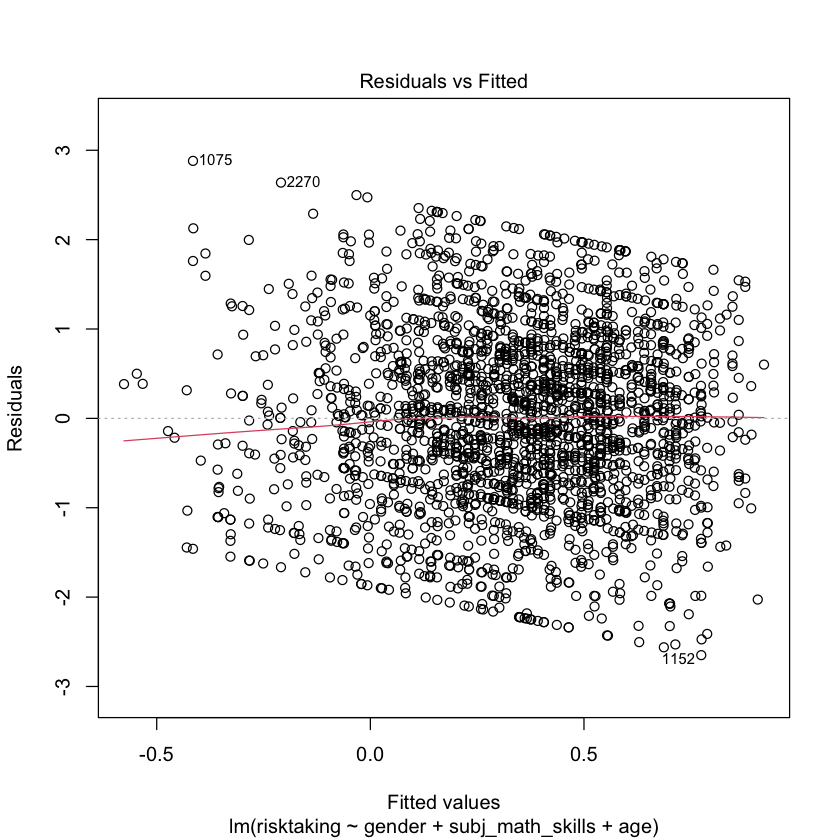

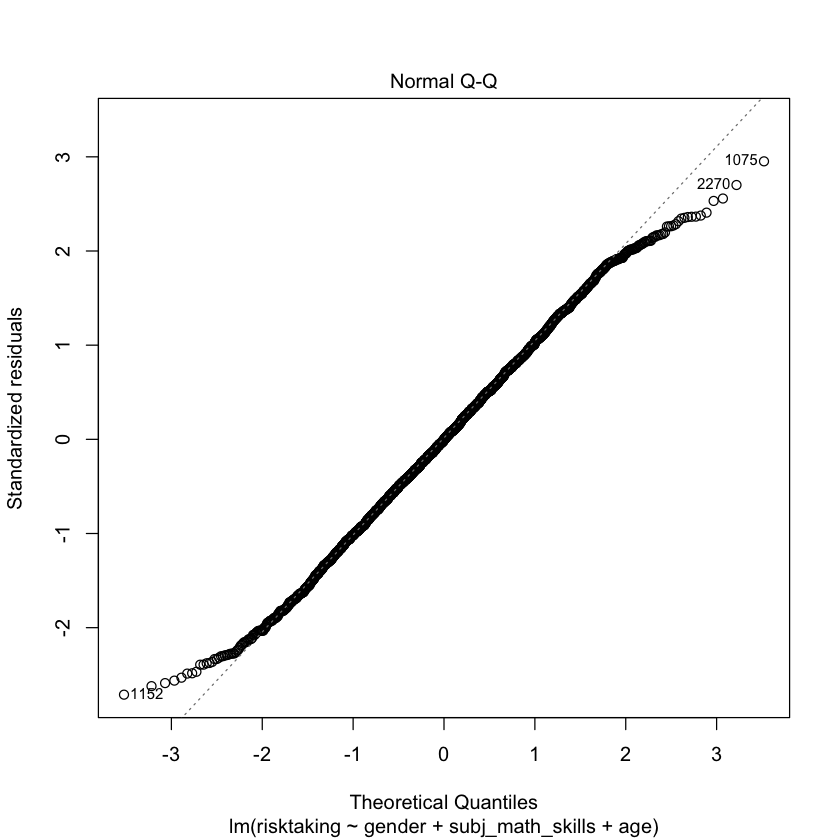

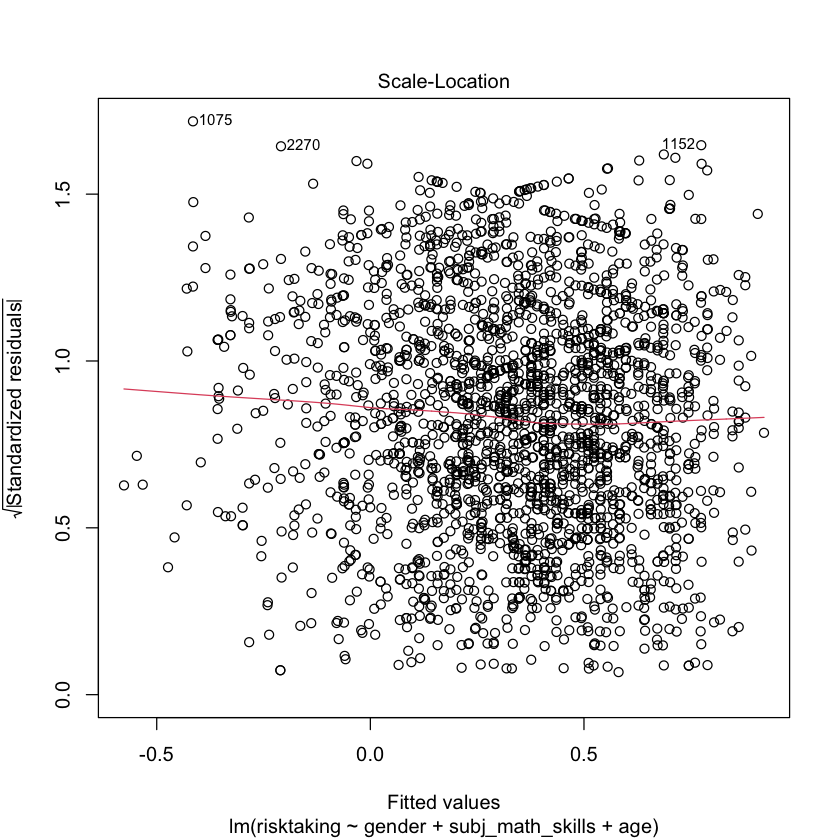

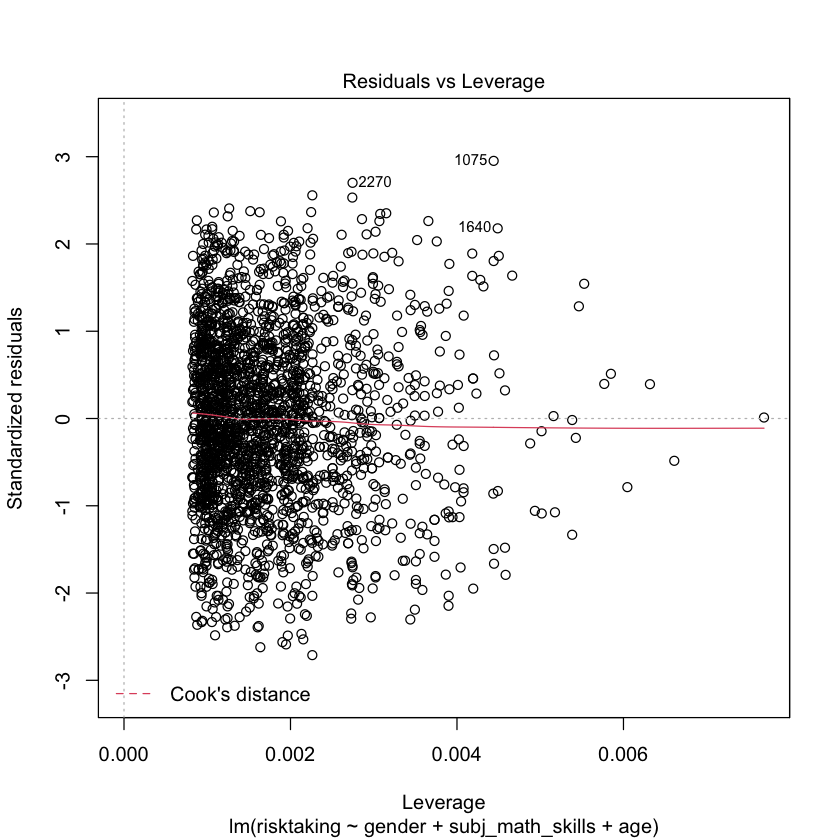

In [28]:
plot(modelALL_risktaking[["Iran"]])

In [13]:
dataComplete[country == "Italy" & (cooks.distance(modelALL_risktaking[["Italy"]]) > 0.015)]

Warning message in country == "Italy" & (cooks.distance(modelALL_risktaking[["Italy"]]) > :
“longer object length is not a multiple of shorter object length”


country,isocode,region,language,patience,risktaking,posrecip,negrecip,altruism,trust,subj_math_skills,gender,age,logAvgGDPpc,trustRaw,ageCateg,trustNumb
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<ord>,<dbl>
Italy,ITA,Lombardy,Italian,0.08435452,1.64076531,0.9598911,0.8521098,-0.1924816,0.9504338,9,0,32,10.51342,0.950433790683746,1,8
Italy,ITA,Campania,Italian,-0.42062220,-0.07201219,-0.2985871,0.5216777,-0.8071160,0.5857736,3,1,70,10.51342,0.585773646831512,3,7
Italy,ITA,Apulia,Italian,-0.13354234,0.66646314,0.2288771,0.6606801,1.3966335,0.9504338,7,0,48,10.51342,0.950433790683746,2,8
Italy,ITA,Umbria,Italian,-0.42062220,0.31272286,1.3253982,1.5928204,0.9963355,0.5857736,3,1,31,10.51342,0.585773646831512,1,7


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



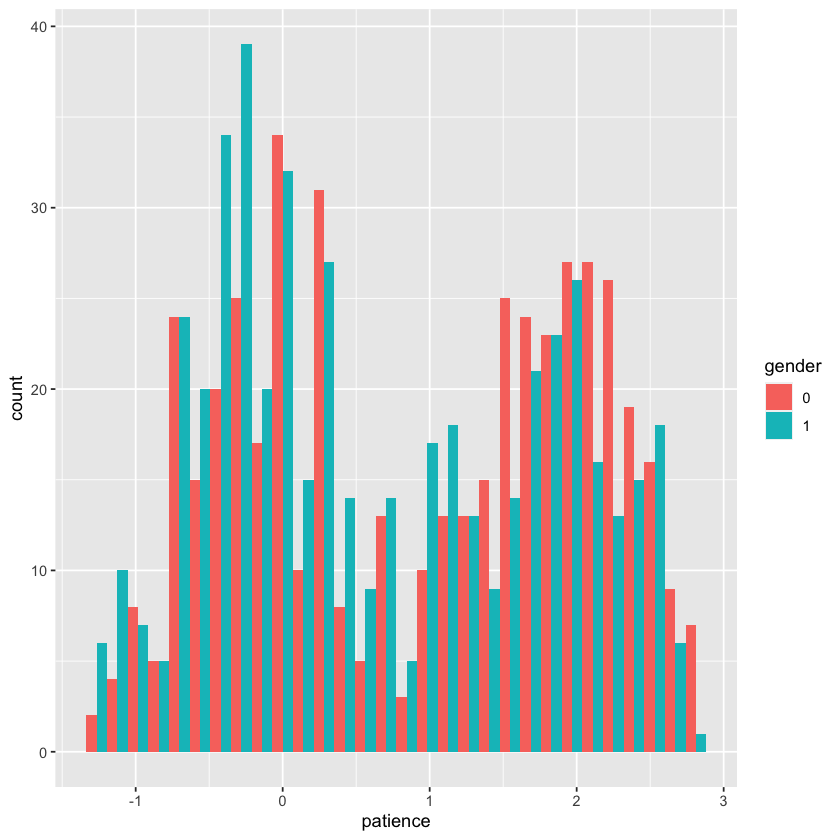

In [14]:
ggplot(dataComplete[country == "Canada"]) +
geom_histogram(aes(x = patience, fill = gender), position = "dodge")

In [15]:
library(MASS)

In [16]:
model <- dlply(dataComplete, "country", function(dt) polr(trustRaw ~ age + gender + subj_math_skills, data = dt, Hess = TRUE))

In [17]:
all_countries <- c()

for (c in unique(dataComplete$country)) {
    model <- polr(trustRaw ~ age + gender + subj_math_skills, data = dataComplete[country == c])
    coeff <- step(model)$coefficient
    dt_coeff <- data.table(country = rep(c, length(coeff)),
                           coefficients = coeff,
                           names_coeff = names(coeff))
    all_countries <- rbind(all_countries, dt_coeff)
}



Start:  AIC=4217.02
trustRaw ~ age + gender + subj_math_skills

                   Df    AIC
<none>                4217.0
- age               1 4218.0
- gender            1 4223.9
- subj_math_skills  1 4254.0
Start:  AIC=4678.07
trustRaw ~ age + gender + subj_math_skills

                   Df    AIC
- age               1 4677.2
<none>                4678.1
- gender            1 4680.1
- subj_math_skills  1 4720.7

Step:  AIC=4677.2
trustRaw ~ gender + subj_math_skills

                   Df    AIC
<none>                4677.2
- gender            1 4679.2
- subj_math_skills  1 4718.7
Start:  AIC=4297.34
trustRaw ~ age + gender + subj_math_skills

                   Df    AIC
- gender            1 4297.1
<none>                4297.3
- age               1 4308.5
- subj_math_skills  1 4334.7

Step:  AIC=4297.09
trustRaw ~ age + subj_math_skills

                   Df    AIC
<none>                4297.1
- age               1 4308.4
- subj_math_skills  1 4332.8
Start:  AIC=4036.85
trustRaw 

In [18]:
head(all_countries)

country,coefficients,names_coeff
<chr>,<dbl>,<chr>
Afghanistan,0.008974781,age
Afghanistan,-0.362161504,gender1
Afghanistan,0.128057154,subj_math_skills
Algeria,0.220377522,gender1
Algeria,0.138773557,subj_math_skills
Argentina,0.010976036,age


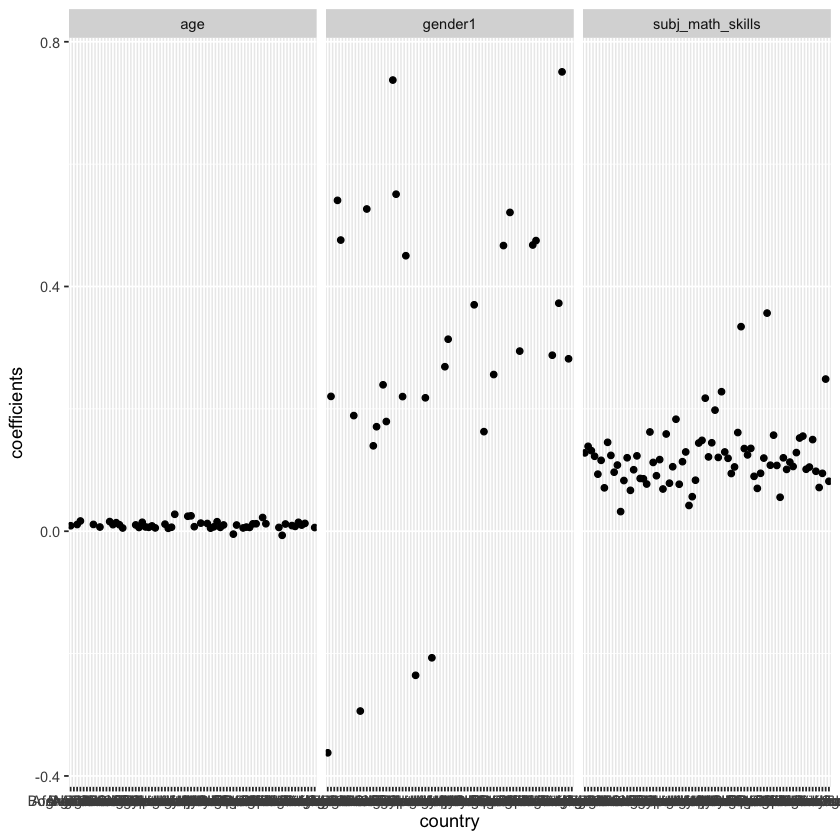

In [19]:
ggplot(all_countries) +
geom_point(aes(x = country, y = coefficients)) +
facet_wrap(~ names_coeff)

In [20]:
all_countries[names_coeff == "gender1", .N]

[1] 32

In [21]:
all_countries[names_coeff == "subj_math_skills", .N]

[1] 76

In [22]:
all_countries[names_coeff == "age", .N]

[1] 49

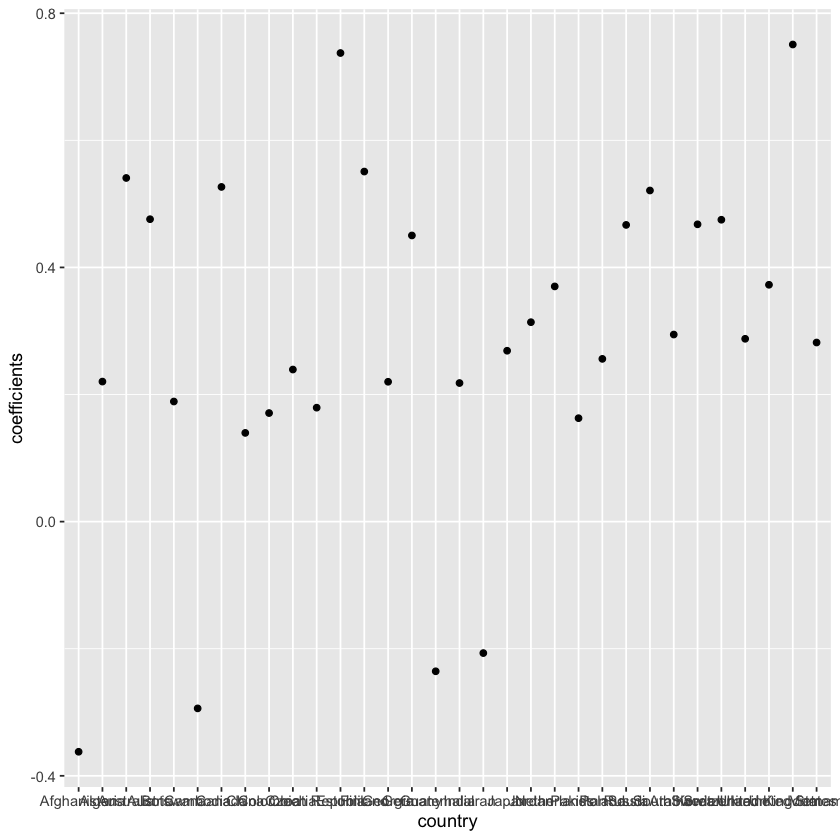

In [23]:
ggplot(all_countries[names_coeff == "gender1"]) +
geom_point(aes(x = country, y = coefficients))